# Python実践データ分析 100本ノック  
## 第10章

### ノック91

In [1]:
import pandas as pd
survey = pd.read_csv("../sample_100knocks/サンプルコード_20200325/10章/survey.csv")
survey.head()

,datetime,comment,satisfaction
0,2019/3/11,駅前に若者が集まっている(AA駅),1
1,2019/2/25,スポーツできる場所があるのが良い,5
2,2019/2/18,子育て支援が嬉しい,5
3,2019/4/9,保育園に入れる（待機児童なし）,4
4,2019/1/6,駅前商店街が寂しい,2


In [2]:
survey.isnull().sum()

datetime        0
comment         2
satisfaction    0
dtype: int64

In [4]:
survey = survey.dropna()
survey.isnull().sum()

datetime        0
comment         0
satisfaction    0
dtype: int64

### ノック92

In [5]:
survey["comment"] = survey["comment"].str.replace("AA", "")
survey.head()

,datetime,comment,satisfaction
0,2019/3/11,駅前に若者が集まっている(駅),1
1,2019/2/25,スポーツできる場所があるのが良い,5
2,2019/2/18,子育て支援が嬉しい,5
3,2019/4/9,保育園に入れる（待機児童なし）,4
4,2019/1/6,駅前商店街が寂しい,2


In [8]:
survey["comment"] = survey["comment"].str.replace("\(.+?\)", "")
survey["comment"] = survey["comment"].str.replace("\（.+?\）", "")
survey.head()

,datetime,comment,satisfaction
0,2019/3/11,駅前に若者が集まっている,1
1,2019/2/25,スポーツできる場所があるのが良い,5
2,2019/2/18,子育て支援が嬉しい,5
3,2019/4/9,保育園に入れる,4
4,2019/1/6,駅前商店街が寂しい,2


### ノック93

In [9]:
survey["comment_length"] = 0
survey.head()

,datetime,comment,satisfaction,comment_length
0,2019/3/11,駅前に若者が集まっている,1,0
1,2019/2/25,スポーツできる場所があるのが良い,5,0
2,2019/2/18,子育て支援が嬉しい,5,0
3,2019/4/9,保育園に入れる,4,0
4,2019/1/6,駅前商店街が寂しい,2,0


In [21]:
survey["comment_length"] = survey["comment"].str.len()
survey.head()

,datetime,comment,satisfaction,comment_length
0,2019/3/11,駅前に若者が集まっている,1,12
1,2019/2/25,スポーツできる場所があるのが良い,5,16
2,2019/2/18,子育て支援が嬉しい,5,9
3,2019/4/9,保育園に入れる,4,7
4,2019/1/6,駅前商店街が寂しい,2,9


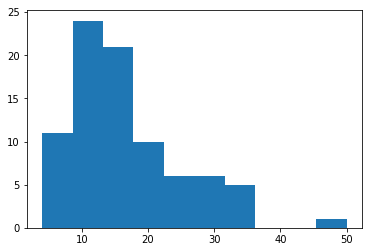

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(survey["comment_length"])
plt.show()

### ノック94

In [25]:
import MeCab
tagger = MeCab.Tagger()
text = "すもももももももものうち"
words = tagger.parse(text)
words

'すもも\t名詞,一般,*,*,*,*,すもも,スモモ,スモモ\nも\t助詞,係助詞,*,*,*,*,も,モ,モ\nもも\t名詞,一般,*,*,*,*,もも,モモ,モモ\nも\t助詞,係助詞,*,*,*,*,も,モ,モ\nもも\t名詞,一般,*,*,*,*,もも,モモ,モモ\nの\t助詞,連体化,*,*,*,*,の,ノ,ノ\nうち\t名詞,非自立,副詞可能,*,*,*,うち,ウチ,ウチ\nEOS\n'

In [26]:
words = tagger.parse(text).splitlines()
words

['すもも\t名詞,一般,*,*,*,*,すもも,スモモ,スモモ',
 'も\t助詞,係助詞,*,*,*,*,も,モ,モ',
 'もも\t名詞,一般,*,*,*,*,もも,モモ,モモ',
 'も\t助詞,係助詞,*,*,*,*,も,モ,モ',
 'もも\t名詞,一般,*,*,*,*,もも,モモ,モモ',
 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ',
 'うち\t名詞,非自立,副詞可能,*,*,*,うち,ウチ,ウチ',
 'EOS']

In [29]:
words_arr = []
for i in words:
    if i == "EOS": continue
    word_tmp = i.split()[0]
    print(i)
    print(word_tmp)
    words_arr.append(word_tmp)
words_arr

すもも	名詞,一般,*,*,*,*,すもも,スモモ,スモモ
すもも
も	助詞,係助詞,*,*,*,*,も,モ,モ
も
もも	名詞,一般,*,*,*,*,もも,モモ,モモ
もも
も	助詞,係助詞,*,*,*,*,も,モ,モ
も
もも	名詞,一般,*,*,*,*,もも,モモ,モモ
もも
の	助詞,連体化,*,*,*,*,の,ノ,ノ
の
うち	名詞,非自立,副詞可能,*,*,*,うち,ウチ,ウチ
うち


['すもも', 'も', 'もも', 'も', 'もも', 'の', 'うち']

### ノック95

In [35]:
import MeCab
tagger = MeCab.Tagger()
text = "すもももももももものうち"
words = tagger.parse(text).splitlines()

words_arr = []
parts = ["名詞", "動詞"]
for i in words:
    if i == "EOS": continue
    word_tmp = i.split()[0]
    part = i.split()[1].split(",")[0]
    if not (part in parts): continue
    words_arr.append(word_tmp)
words_arr

['すもも', 'もも', 'もも', 'うち']

### ノック96

In [37]:
survey

,datetime,comment,satisfaction,comment_length
0,2019/3/11,駅前に若者が集まっている,1,12
1,2019/2/25,スポーツできる場所があるのが良い,5,16
2,2019/2/18,子育て支援が嬉しい,5,9
3,2019/4/9,保育園に入れる,4,7
4,2019/1/6,駅前商店街が寂しい,2,9
...,...,...,...,...
81,2019/1/21,小学校の校庭が芝生なのでとても良い,5,17
82,2019/4/30,ホームページからアンケートを投稿できるようにしてほしい,2,27
83,2019/1/9,公園に遊び道具が少なすぎる,1,13
84,2019/3/9,もっと公園を増やしてほしい,2,13


In [72]:
import MeCab
tagger = MeCab.Tagger()

all_words = []
words_arr = []
parts = ["名詞"]

for i in range(len(survey)):
    comment = survey["comment"].iloc[i]
    words = tagger.parse(comment).splitlines()
    for j in words:
        if j == "EOS": continue
        word = j.split()[0]
        part = j.split()[1].split(",")[0]
        if not (part in parts): continue
        words_arr.append(word)
all_words.extend(words_arr)
print(all_words)

['駅前', '若者', 'スポーツ', '場所', 'の', '子育て', '支援', '保育園', '駅前', '商店', '街', '生活', '便利', '場所', '場所', '商業', '施設', '病院', '充実', 'サイクリング', 'コース', '祭り', '小学校', '綺麗', '公園', '近く', '公園', 'スーパー', 'の', '大変', '子育て', 'デートスポット', '商店', '街', '夜道', 'ゴミ', '処理', '楽', '映画', '館', '街路', '樹', '公園', '追加', '観光', 'スポット', '子育て', '道', '綺麗', '都内', 'アクセス', '家賃', 'リーズナブル', 'BBB', '渋滞', '商店', '街', '屋根', '雨', '大変', '商店', '街', 'たくさん', '喫茶店', 'スポーツ', 'ジム', '利用', 'スポーツ', 'ジム', '利用', '料金', 'ママ', '支援', 'バス', '自転車', 'ランニング', '運動', '場所', '有名', '企業', '駅前', '駐車', '場', '変', 'おじさん', '声', '事', '警察', '巡回', '強化', '消防', '団', '活発', '安心', '災害', '時', '避難', '場所', '気', '最近', '川', '氾濫', '被害', '町', 'よう', '氾濫', '防止', '説明', '信号', '交差点', 'ｘｘｘ', '事故', 'そう', '信号', '商店', '街', '活性', '化', '活動', '行政', '後押し', '子ども', '安全', '場所', '駅前', '駐輪場', '不便', '街路', '樹', '落ち葉', '掃除', '大変', '街路', '樹', '災害', '時', '備蓄', '状況', '歩道', '道', '安心', '地域', '自治体', '支援', '自治体', '活動', '頻繁', '安心', '観光', '地', '最近', '県', 'ナンバー', '車', '防犯', 'の', '駐車', '場', '数', '料金', '駅前', '公共', '駐車', '場

In [74]:
all_words_df = pd.DataFrame({"words":all_words, "count":len(all_words)*[1]})
all_words_df.head()

,words,count
0,駅前,1
1,若者,1
2,スポーツ,1
3,場所,1
4,の,1


In [78]:
all_words_df = all_words_df.groupby("words").sum()
all_words_df.head()

,count
words,
BBB,1
^^,1
おじさん,1
ごみ,1
そう,1


In [79]:
all_words_df.sort_values("count", ascending=False)

,count
words,
駅前,7
場所,6
街,6
の,5
公園,5
...,...
奇麗,1
姿勢,1
子ども,1


### ノック97

In [80]:
survey

,datetime,comment,satisfaction,comment_length
0,2019/3/11,駅前に若者が集まっている,1,12
1,2019/2/25,スポーツできる場所があるのが良い,5,16
2,2019/2/18,子育て支援が嬉しい,5,9
3,2019/4/9,保育園に入れる,4,7
4,2019/1/6,駅前商店街が寂しい,2,9
...,...,...,...,...
81,2019/1/21,小学校の校庭が芝生なのでとても良い,5,17
82,2019/4/30,ホームページからアンケートを投稿できるようにしてほしい,2,27
83,2019/1/9,公園に遊び道具が少なすぎる,1,13
84,2019/3/9,もっと公園を増やしてほしい,2,13


In [83]:
import MeCab
tagger = MeCab.Tagger()

all_words = []
words_arr = []
stop_words = ["の"]
parts = ["名詞"]

for i in range(len(survey)):
    comment = survey["comment"].iloc[i]
    words = tagger.parse(comment).splitlines()
    for j in words:
        if j == "EOS": continue
        word = j.split()[0]
        part = j.split()[1].split(",")[0]
        if not (part in parts): continue
        if (word in stop_words): continue
        words_arr.append(word)
all_words.extend(words_arr)
print(all_words)

['駅前', '若者', 'スポーツ', '場所', '子育て', '支援', '保育園', '駅前', '商店', '街', '生活', '便利', '場所', '場所', '商業', '施設', '病院', '充実', 'サイクリング', 'コース', '祭り', '小学校', '綺麗', '公園', '近く', '公園', 'スーパー', '大変', '子育て', 'デートスポット', '商店', '街', '夜道', 'ゴミ', '処理', '楽', '映画', '館', '街路', '樹', '公園', '追加', '観光', 'スポット', '子育て', '道', '綺麗', '都内', 'アクセス', '家賃', 'リーズナブル', 'BBB', '渋滞', '商店', '街', '屋根', '雨', '大変', '商店', '街', 'たくさん', '喫茶店', 'スポーツ', 'ジム', '利用', 'スポーツ', 'ジム', '利用', '料金', 'ママ', '支援', 'バス', '自転車', 'ランニング', '運動', '場所', '有名', '企業', '駅前', '駐車', '場', '変', 'おじさん', '声', '事', '警察', '巡回', '強化', '消防', '団', '活発', '安心', '災害', '時', '避難', '場所', '気', '最近', '川', '氾濫', '被害', '町', 'よう', '氾濫', '防止', '説明', '信号', '交差点', 'ｘｘｘ', '事故', 'そう', '信号', '商店', '街', '活性', '化', '活動', '行政', '後押し', '子ども', '安全', '場所', '駅前', '駐輪場', '不便', '街路', '樹', '落ち葉', '掃除', '大変', '街路', '樹', '災害', '時', '備蓄', '状況', '歩道', '道', '安心', '地域', '自治体', '支援', '自治体', '活動', '頻繁', '安心', '観光', '地', '最近', '県', 'ナンバー', '車', '防犯', '駐車', '場', '数', '料金', '駅前', '公共', '駐車', '場', '歩行', '者', '

In [96]:
all_words_df = pd.DataFrame({"words":all_words, "count":len(all_words)*[1]})
all_words_df

,words,count
0,駅前,1
1,若者,1
2,スポーツ,1
3,場所,1
4,子育て,1
...,...,...
271,公園,1
272,駅前,1
273,駐車,1
274,場,1


In [97]:
all_words_df = all_words_df.groupby("words").sum()

In [98]:
all_words_df.sort_values("count", ascending=False)

,count
words,
駅前,7
場所,6
街,6
公園,5
商店,5
...,...
奇麗,1
姿勢,1
子ども,1


### ノック98

In [99]:
survey

,datetime,comment,satisfaction,comment_length
0,2019/3/11,駅前に若者が集まっている,1,12
1,2019/2/25,スポーツできる場所があるのが良い,5,16
2,2019/2/18,子育て支援が嬉しい,5,9
3,2019/4/9,保育園に入れる,4,7
4,2019/1/6,駅前商店街が寂しい,2,9
...,...,...,...,...
81,2019/1/21,小学校の校庭が芝生なのでとても良い,5,17
82,2019/4/30,ホームページからアンケートを投稿できるようにしてほしい,2,27
83,2019/1/9,公園に遊び道具が少なすぎる,1,13
84,2019/3/9,もっと公園を増やしてほしい,2,13


In [100]:
import MeCab
tagger = MeCab.Tagger()

all_words = []
words_arr = []
satisfaction = []
stop_words = ["の"]
parts = ["名詞"]

for i in range(len(survey)):
    comment = survey["comment"].iloc[i]
    words = tagger.parse(comment).splitlines()
    for j in words:
        if j == "EOS": continue
        word = j.split()[0]
        part = j.split()[1].split(",")[0]
        if not (part in parts): continue
        if (word in stop_words): continue
        words_arr.append(word)
        satisfaction.append(survey["satisfaction"].iloc[i])
all_words.extend(words_arr)

In [101]:
all_words_df = pd.DataFrame({"words":all_words, "satisfaction":satisfaction, "count":len(all_words)*[1]})
all_words_df

,words,satisfaction,count
0,駅前,1,1
1,若者,1,1
2,スポーツ,5,1
3,場所,5,1
4,子育て,5,1
...,...,...,...
271,公園,2,1
272,駅前,1,1
273,駐車,1,1
274,場,1,1


In [102]:
words_satisfaction = all_words_df.groupby("words").mean()["satisfaction"]
words_satisfaction

words
BBB     2.0
^^      5.0
おじさん    1.0
ごみ      2.0
そう      1.0
       ... 
駐車      1.0
駐輪場     1.0
高速      1.0
高齢      2.0
ｘｘｘ     1.0
Name: satisfaction, Length: 183, dtype: float64

In [103]:
words_count = all_words_df.groupby("words").sum()["count"]
words_count

words
BBB     1
^^      1
おじさん    1
ごみ      1
そう      1
       ..
駐車      4
駐輪場     1
高速      1
高齢      1
ｘｘｘ     1
Name: count, Length: 183, dtype: int64

In [107]:
words_df = pd.concat([words_satisfaction, words_count], axis=1)
words_df

,satisfaction,count
words,,
BBB,2.0,1
^^,5.0,1
おじさん,1.0,1
ごみ,2.0,1
そう,1.0,1
...,...,...
駐車,1.0,4
駐輪場,1.0,1
高速,1.0,1


In [110]:
words_df = words_df.loc[words_df["count"]>=3]
words_df.sort_values("satisfaction", ascending=True).head()

,satisfaction,count
words,,
駐車,1.000000,4
場,1.000000,4
信号,1.333333,3
大変,1.333333,3
駅前,1.428571,7


In [111]:
words_df.sort_values("satisfaction", ascending=False).head()

,satisfaction,count
words,,
子育て,4.333333,3
綺麗,4.333333,3
安心,4.333333,3
スポーツ,3.666667,3
道,3.000000,3


### ノック99

In [120]:
import MeCab
tagger = MeCab.Tagger()

all_words_df = pd.DataFrame()
parts = ["名詞"]

for i in range(len(survey)):
    comment = survey["comment"].iloc[i]
    words = tagger.parse(comment).splitlines()
    words_df = pd.DataFrame()
    for j in words:
        if j == "EOS": continue
        word = j.split()[0]
        part = j.split()[1].split(",")[0]
        if not (part in parts): continue
        words_df[word] = [1]
    all_words_df = pd.concat([all_words_df, words_df], ignore_index=True)
all_words_df.head()

,駅前,若者,スポーツ,場所,の,子育て,支援,保育園,商店,街,...,マスコット,夜間,不安,高齢,サポート,校庭,芝生,投稿,遊び,道具
0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
all_words_df = all_words_df.fillna(0)
all_words_df.head()

,駅前,若者,スポーツ,場所,の,子育て,支援,保育園,商店,街,...,マスコット,夜間,不安,高齢,サポート,校庭,芝生,投稿,遊び,道具
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### ノック100

In [115]:
survey

,datetime,comment,satisfaction,comment_length
0,2019/3/11,駅前に若者が集まっている,1,12
1,2019/2/25,スポーツできる場所があるのが良い,5,16
2,2019/2/18,子育て支援が嬉しい,5,9
3,2019/4/9,保育園に入れる,4,7
4,2019/1/6,駅前商店街が寂しい,2,9
...,...,...,...,...
81,2019/1/21,小学校の校庭が芝生なのでとても良い,5,17
82,2019/4/30,ホームページからアンケートを投稿できるようにしてほしい,2,27
83,2019/1/9,公園に遊び道具が少なすぎる,1,13
84,2019/3/9,もっと公園を増やしてほしい,2,13


In [127]:
print(survey["comment"].iloc[2])
target_text = all_words_df.iloc[2]
print(target_text)

子育て支援が嬉しい
駅前         0.0
若者         0.0
スポーツ       0.0
場所         0.0
の          0.0
          ... 
芝生         0.0
投稿         0.0
遊び         0.0
道具         0.0
cos_sim    1.0
Name: 2, Length: 185, dtype: float64


In [128]:
import numpy as np
cos_sim = []
for i in range(len(all_words_df)):
    cos_text = all_words_df.iloc[i]
    cos = np.dot(target_text, cos_text) / (np.linalg.norm(target_text) * np.linalg.norm(cos_text))
    cos_sim.append(cos)
all_words_df["cos_sim"] = cos_sim
all_words_df.sort_values("cos_sim", ascending=False)

,駅前,若者,スポーツ,場所,の,子育て,支援,保育園,商店,街,...,夜間,不安,高齢,サポート,校庭,芝生,投稿,遊び,道具,cos_sim
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
24,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.804738
15,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.804738
33,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.577350
50,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.456896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
